In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder




In [ ]:
train=pd.read_csv('fraudTrain.csv')
test=pd.read_csv('fraudTest.csv')

In [ ]:
train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
test.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670419 entries, 0 to 670418
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             670419 non-null  int64  
 1   trans_date_trans_time  670419 non-null  object 
 2   cc_num                 670419 non-null  int64  
 3   merchant               670419 non-null  object 
 4   category               670419 non-null  object 
 5   amt                    670419 non-null  float64
 6   first                  670419 non-null  object 
 7   last                   670419 non-null  object 
 8   gender                 670419 non-null  object 
 9   street                 670419 non-null  object 
 10  city                   670419 non-null  object 
 11  state                  670419 non-null  object 
 12  zip                    670419 non-null  int64  
 13  lat                    670419 non-null  float64
 14  long                   670418 non-nu

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,670419.0,3.352090e+05,1.935334e+05,0.000000e+00,1.676045e+05,3.352090e+05,5.028135e+05,6.704180e+05
cc_num,670419.0,4.167525e+17,1.308363e+18,6.041621e+10,1.800365e+14,3.520550e+15,4.642255e+15,4.992346e+18
amt,670419.0,7.025549e+01,1.594151e+02,1.000000e+00,9.640000e+00,4.740000e+01,8.302000e+01,2.654412e+04
zip,670419.0,4.878564e+04,2.690922e+04,1.257000e+03,2.604100e+04,4.817400e+04,7.201100e+04,9.978300e+04
lat,670419.0,3.853591e+01,5.074605e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.189480e+01,6.669330e+01
long,670418.0,-9.022099e+01,1.376807e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,670418.0,8.902033e+04,3.026560e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,670418.0,1.338597e+09,6.765918e+06,1.325376e+09,1.333072e+09,1.339162e+09,1.344223e+09,1.350094e+09
merch_lat,670418.0,3.853572e+01,5.108738e+00,1.902980e+01,3.474051e+01,3.936613e+01,4.195366e+01,6.751027e+01
merch_long,670418.0,-9.022145e+01,1.377991e+01,-1.666712e+02,-9.688908e+01,-8.743024e+01,-8.021800e+01,-6.695654e+01


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


In [ ]:
train.shape

(670419, 23)

In [ ]:
test.shape

(555719, 23)

In [ ]:
train.isnull().values.any()

True

In [ ]:
test.isnull().values.any()

False

In [ ]:
train = train.dropna(axis=0)

In [ ]:
train = train.dropna(axis=1)

In [ ]:
train.isnull().values.any()

False

<Axes: >

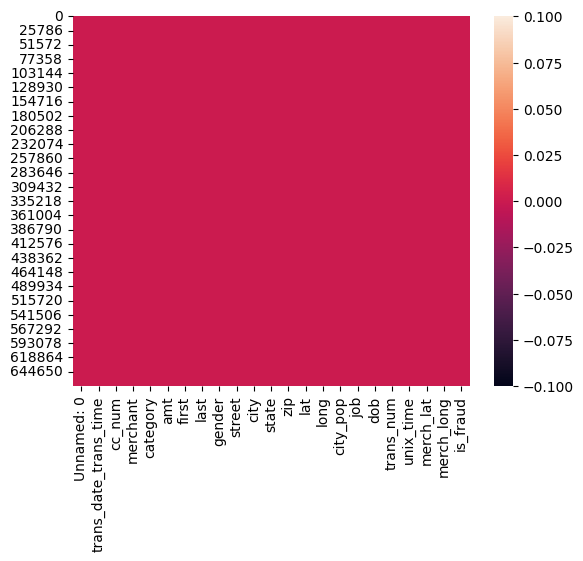

In [ ]:
sns.heatmap(train.isnull())

In [ ]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
def cleaning_data(clean):
    clean.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num',
                'trans_date_trans_time'],axis=1, inplace=True)
    clean.dropna()
    return clean

In [ ]:
cleaning_data(train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
670413,"fraud_Nitzsche, Kessler and Wolff",shopping_pos,4.79,F,30.7148,-85.0210,3699.0,Art gallery manager,1.350094e+09,31.037270,-84.036971,0.0
670414,fraud_Kuhic Inc,grocery_pos,168.39,F,38.9462,-94.9714,5760.0,Chief Executive Officer,1.350094e+09,38.628869,-94.191324,0.0
670415,fraud_Harris Inc,gas_transport,40.59,M,39.8788,-82.1880,1831.0,Barrister's clerk,1.350094e+09,40.540525,-81.946453,0.0
670416,fraud_Schmitt Inc,gas_transport,53.08,F,36.7651,-94.0492,760.0,Production manager,1.350094e+09,36.519713,-94.716571,0.0


In [ ]:
cleaning_data(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [ ]:
train['gender'] = train['gender'].map({'M': 0, 'F': 1})

In [ ]:
encoder = LabelEncoder()
def encode(data):
    data["merchant"] = encoder.fit_transform(data["merchant"])
    data["category"] = encoder.fit_transform(data["category"])
    data["gender"] = encoder.fit_transform(data["gender"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [ ]:
encode(train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,1,36.0788,-81.1781,3495.0,365,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,1,48.8878,-118.2105,149.0,421,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,0,42.1808,-112.2620,4154.0,302,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,0,46.2306,-112.1138,1939.0,323,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,0,38.4207,-79.4629,99.0,114,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
670413,454,12,4.79,1,30.7148,-85.0210,3699.0,36,1.350094e+09,31.037270,-84.036971,0.0
670414,345,4,168.39,1,38.9462,-94.9714,5760.0,72,1.350094e+09,38.628869,-94.191324,0.0
670415,231,2,40.59,0,39.8788,-82.1880,1831.0,44,1.350094e+09,40.540525,-81.946453,0.0
670416,559,2,53.08,1,36.7651,-94.0492,760.0,357,1.350094e+09,36.519713,-94.716571,0.0


In [ ]:
encode(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


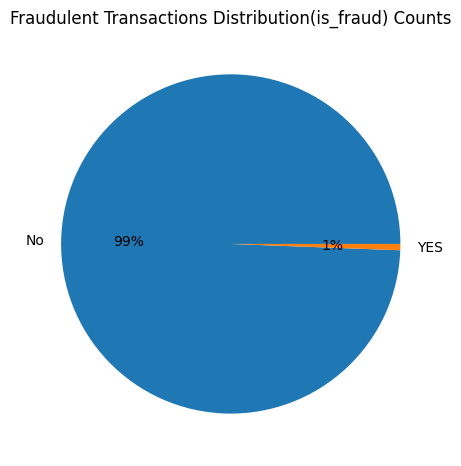

In [ ]:
exit_counts = train["is_fraud"].value_counts()
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("Fraudulent Transactions Distribution(is_fraud) Counts")
plt.tight_layout()
plt.show()

In [ ]:
test.corr()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
merchant,1.000000,0.028033,-0.003780,-0.002018,0.000455,0.000466,-0.000194,-0.000713,-0.001017,0.000743,0.000395,-0.000086
category,0.028033,1.000000,0.026811,-0.027684,-0.008215,-0.002902,0.009164,0.001794,0.001097,-0.008180,-0.002967,0.016980
amt,-0.003780,0.026811,1.000000,0.000027,0.002339,-0.002046,0.002760,-0.004848,-0.000974,0.002404,-0.002053,0.182267
gender,-0.002018,-0.027684,0.000027,1.000000,0.042692,0.051235,-0.029367,-0.079028,-0.000577,0.042569,0.051203,0.000748
lat,0.000455,-0.008215,0.002339,0.042692,1.000000,-0.012892,-0.152666,-0.025205,0.000301,0.993557,-0.012831,0.005863
long,0.000466,-0.002902,-0.002046,0.051235,-0.012892,1.000000,-0.051524,-0.001133,-0.001460,-0.012551,0.999115,-0.000972
city_pop,-0.000194,0.009164,0.002760,-0.029367,-0.152666,-0.051524,1.000000,-0.053170,-0.000740,-0.151703,-0.051489,-0.004910
job,-0.000713,0.001794,-0.004848,-0.079028,-0.025205,-0.001133,-0.053170,1.000000,0.000699,-0.025147,-0.001057,-0.005074
unix_time,-0.001017,0.001097,-0.000974,-0.000577,0.000301,-0.001460,-0.000740,0.000699,1.000000,0.000365,-0.001485,-0.013066
merch_lat,0.000743,-0.008180,0.002404,0.042569,0.993557,-0.012551,-0.151703,-0.025147,0.000365,1.000000,-0.012496,0.005812


In [ ]:
train.corr()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
merchant,1.000000,0.031804,-0.004361,0.001184,-0.003439,-0.000568,0.002756,0.002328,-0.000332,-0.003508,-0.000595,-0.001517
category,0.031804,1.000000,0.031054,0.028244,-0.009070,-0.000977,0.008893,0.001922,0.000660,-0.008971,-0.001019,0.020052
amt,-0.004361,0.031054,1.000000,-0.000877,-0.000246,0.001235,0.004958,-0.001910,-0.003880,-0.000385,0.001264,0.219050
gender,0.001184,0.028244,-0.000877,1.000000,-0.042011,-0.051691,0.029236,0.077236,0.000332,-0.041767,-0.051653,-0.006372
lat,-0.003439,-0.009070,-0.000246,-0.042011,1.000000,-0.016774,-0.155693,-0.026179,-0.000315,0.993589,-0.016742,0.004785
long,-0.000568,-0.000977,0.001235,-0.051691,-0.016774,1.000000,-0.052139,-0.002726,-0.001223,-0.016802,0.999120,0.001586
city_pop,0.002756,0.008893,0.004958,0.029236,-0.155693,-0.052139,1.000000,-0.054672,-0.002192,-0.154724,-0.052123,-0.000597
job,0.002328,0.001922,-0.001910,0.077236,-0.026179,-0.002726,-0.054672,1.000000,0.000739,-0.025891,-0.002764,-0.000815
unix_time,-0.000332,0.000660,-0.003880,0.000332,-0.000315,-0.001223,-0.002192,0.000739,1.000000,-0.000336,-0.001241,-0.016951
merch_lat,-0.003508,-0.008971,-0.000385,-0.041767,0.993589,-0.016802,-0.154724,-0.025891,-0.000336,1.000000,-0.016777,0.004648


<Axes: >

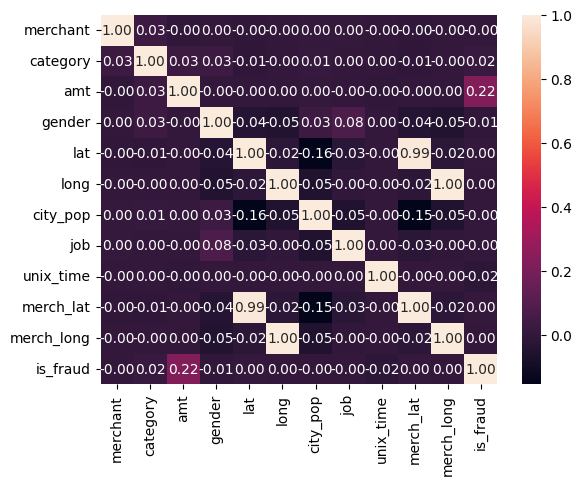

In [ ]:
sns.heatmap(train.corr(), annot=True, cmap='rocket', fmt=".2f")

In [ ]:
x = train.drop(columns=["is_fraud"], inplace=False)
y = train["is_fraud"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()

In [ ]:
columns = ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier']
accuracies = []

In [ ]:
def cal(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print("-----Model Evaluation on Test Data-----")
    print(model)
    print()
    print(accuracy)


In [ ]:
cal(model1)

-----Model Evaluation on Test Data-----
LogisticRegression()

0.9943393693505563


In [ ]:
cal(model2)

-----Model Evaluation on Test Data-----
RandomForestClassifier()

0.997553772262164


In [ ]:
cal(model3)

-----Model Evaluation on Test Data-----
DecisionTreeClassifier()

0.9959130097550789


In [ ]:
FinalResult = pd.DataFrame({'Algorithm': columns, 'Accuracy': accuracies})
FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.994339
1,RandomForestClassifier,0.997554
2,DecisionTreeClassifier,0.995913


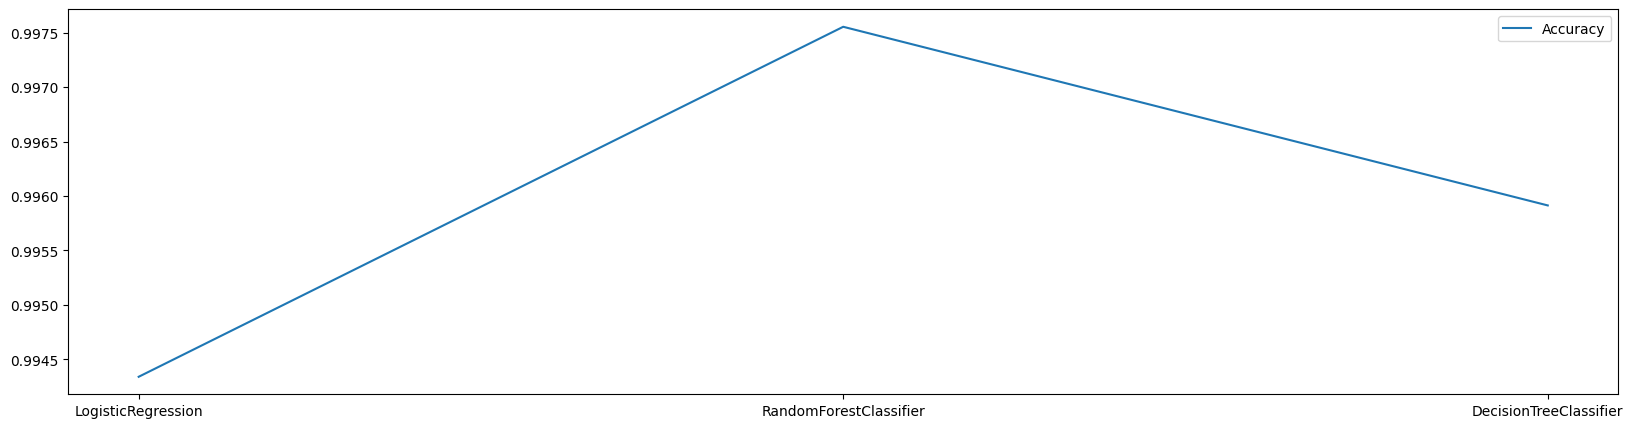

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the accuracies for each algorithm
plt.plot(FinalResult.Algorithm, accuracies, label="Accuracy")

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Separate features (X_test) and target variable (y_test) for the test dataset
x_test = test.drop(columns=["is_fraud"], inplace=False)
y_test = test["is_fraud"]

In [ ]:
# Predict using the Random Forest Classifier model
y_pred = model2.predict(x_test)

# Display the predicted values
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Calculate the accuracy of the Random Forest Classifier model
accuracy = accuracy_score(test['is_fraud'], y_pred)

# Display the accuracy
accuracy

0.9972090211059906